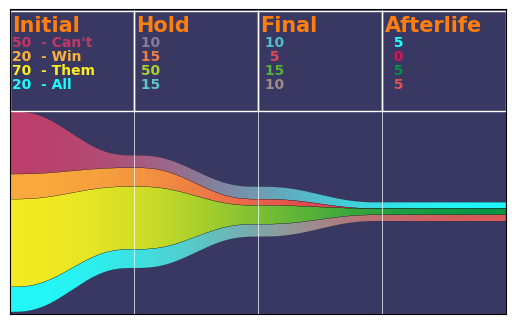

In [3]:
import matplotlib.pyplot as plt
from src.funel_graph import FunelGraph
colors = [
    ['#C33764', '#1BFFFF'],['#FBB03B', '#D4145A'],
    ['#FCEE21', '#009245'],['#1BFFFF', '#e05153'],
    ['#009245', '#FCEE21']
    ]

fg = FunelGraph()
fg.prepare()
fg.draw(colors=colors, apply_colorQ=True)
plt.savefig('data\example.png')
plt.show()

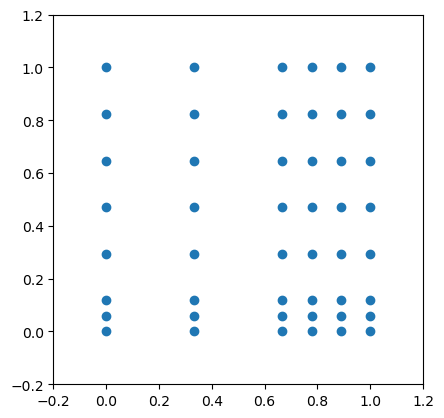

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def divide_according_to_ratios_and_quantities(
        length:float=2.0,
        strength:np.ndarray=np.array([0.5, 1/6]),
        number: np.ndarray=np.array([2, 3]),
        ):
    total  = (strength * number).sum()
    ratios = (strength * number) / total
    dividers = np.cumsum(np.hstack(([0],ratios))*length)
    intervals = np.vstack((dividers[:-1],dividers[1:])).T
    # why +1? - linspace needs one more num to procude <number> of intervals
    res = np.hstack([
        np.linspace(*ep, number[i] + 1) 
         for i, ep in enumerate(intervals)
         ])
    return np.unique(res)

import numpy as np
import matplotlib.pyplot as plt

X = divide_according_to_ratios_and_quantities(length=1, strength=np.array([0.5, 1/6]), number=np.array([2, 3]))
Y = divide_according_to_ratios_and_quantities(length=1, strength=np.array([1/6, 0.5]), number=np.array([2, 5]))
pts = np.array(np.meshgrid(X,Y)).T.reshape(-1,2)
fig, ax = plt.subplots()
ax.set(xlim=(-0.2,1.2),ylim=(-0.2,1.2))
ax.set_aspect('equal')
ax.scatter(*pts.T)
plt.show

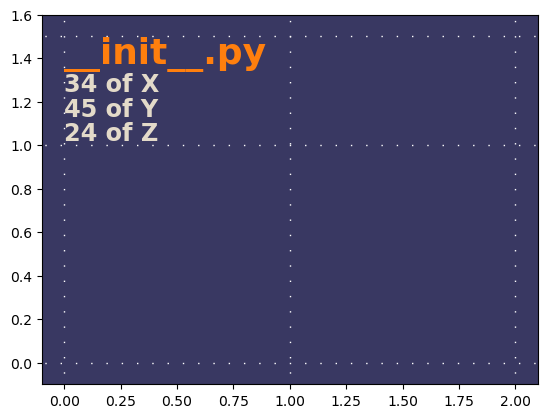

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.patches import Rectangle
from matplotlib.text import Annotation
from matplotlib.transforms import Bbox

title_kwargs = dict(
    size=15,
    color="tab:orange",
    va='top', ha='left',
    family='sans-serif',
    weight="bold",
    )

label_kwargs = dict(
    size=10,
    color='#e3dac9',
    va='top', ha='left',
    weight='bold', 
    family='sans-serif'
    )

def get_scale(text:Annotation, rect:Rectangle):
    rect_Bbox:Bbox = rect.get_window_extent()
    text_Bbox:Bbox = text.get_window_extent()
    scale = min(rect_Bbox.height / text_Bbox.height,
                rect_Bbox.width / text_Bbox.width)
    return scale

def divide_according_to_ratios_and_quantities(
        length:float=2.0,
        strength:np.ndarray=np.array([0.5, 1/3]),
        number: np.ndarray=np.array([2, 3]),
        ):
    """ The use:
    
        import numpy as np
        import matplotlib.pyplot as plt

        X = divide_according_to_ratios_and_quantities(length=1, strength=np.array([0.5, 1/6]), number=np.array([2, 3]))
        Y = divide_according_to_ratios_and_quantities(length=1, strength=np.array([1/6, 0.5]), number=np.array([2, 5]))
        pts = np.array(np.meshgrid(X,Y)).T.reshape(-1,2)
        fig, ax = plt.subplots()
        ax.set(xlim=(-0.2,1.2),ylim=(-0.2,1.2))
        ax.set_aspect('equal')
        ax.scatter(*pts.T)
        plt.show
    """
    total  = (strength * number).sum()
    ratios = (strength * number) / total
    dividers = np.cumsum(np.hstack(([0],ratios))*length)
    intervals = np.vstack((dividers[:-1],dividers[1:])).T
    # why +1? - linspace needs one more num to procude <number> of intervals
    res = np.hstack([
        np.linspace(*ep, number[i] + 1) 
         for i, ep in enumerate(intervals)
         ])
    return res

window_width = 1

window_height = 0.5
graph_height = 1

fig, ax = plt.subplots()
ax.set_facecolor('#393862')

ax.set(xlim=(-0.1, 2*window_width+0.1), ylim=(-0.1, 1 + window_height+ 0.1))
ax.hlines(y=[0, 1, 1.5], xmin=-1, xmax=3, lw=1, colors='w', linestyle=(0, (1, 10)))
ax.vlines(x=[0, 1, 2], ymin=-1, ymax=2, lw=1,colors='w', linestyle=(0, (1, 10)))

# future function arguments:
visible = False
titles = ['__init__.py']
labels =  ['34 of X', '45 of Y','24 of Z']
str_s = np.array([1.5, 1])
numbers_sum = '103'

starting_points = divide_according_to_ratios_and_quantities(
    length=window_height,
    strength=str_s,
    number=np.array([len(titles), len(labels)])
    )
anchors = 1 + window_height - starting_points
titles_anchors = anchors[:len(titles)+1]
labels_anchors = anchors[-len(labels)-1:]

def draw_from_anchors(ax:Axes, string_list, width, anchors, above_or_below, ec, text_kwargs):
    annotations = []
    scales = []
    height = abs(above_or_below - anchors[0]) if len(anchors) == 1 else np.diff(anchors)[0]
    for i, string in enumerate(string_list):
        rect = Rectangle(xy = (0, anchors[i]), 
                            width=width, height=height, 
                            fill=False, ec=ec,lw=0.5 ,ls='--',visible=visible)
        ax.add_patch(rect)
        annotations.append(ax.annotate(string, xy=(0,1), xytext=(0,1), xycoords=rect, **text_kwargs))
        scales.append(get_scale(annotations[-1], rect))
    scale = min(scales)
    for text in annotations:
        text:Annotation
        text.set_fontsize(text.get_fontsize() * scale)

draw_from_anchors(
    ax=ax,
    string_list=titles,
    width=1,
    anchors=titles_anchors,
    above_or_below=titles_anchors[0],
    ec='orange',
    text_kwargs=title_kwargs)

draw_from_anchors(
    ax=ax,
    string_list=labels,
    width=0.5,
    anchors=labels_anchors,
    above_or_below=titles_anchors[-1],
    ec='w',
    text_kwargs=label_kwargs)

plt.show()

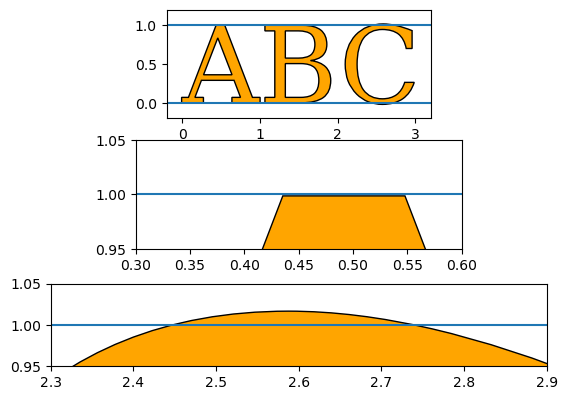

In [6]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.textpath import TextPath
from matplotlib.font_manager import FontProperties
from matplotlib.patches import PathPatch

fig, ax = plt.subplots(3, dpi=100)
ax[0].set(xlim=(-0.2, 3.2), ylim=(-0.2, 1.2))
ax[1].set(xlim=(0.3, 0.6), ylim=(0.95, 1.05))
ax[2].set(xlim=(2.3, 2.9), ylim=(0.95, 1.05))

from matplotlib.font_manager import FontProperties

fp = FontProperties(family='serif')
for i in [0,1,2]:
    path = TextPath((0, 0), "ABC", size=1, prop=fp)
    p = PathPatch(path, facecolor='orange', lw=1)
    transform = Affine2D().scale(100/73)
    p.set_transform(transform+ax[i].transData)
    ax[i].add_patch(p)
    ax[i].set_aspect('equal')

    ax[i].hlines(y=[0,1], xmin=-1, xmax=4)

plt.show()

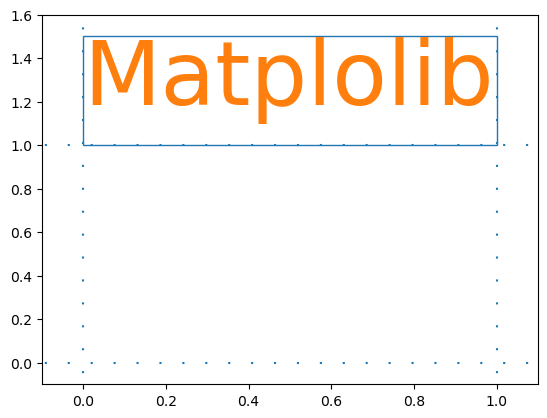

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.text import Annotation
from matplotlib.transforms import Bbox

def get_scale(text:Annotation, rect:Rectangle):
    rect_Bbox:Bbox = rect.get_window_extent()
    text_Bbox:Bbox = text.get_window_extent()
    scale = min(rect_Bbox.height / text_Bbox.height,
                rect_Bbox.width / text_Bbox.width)
    return scale

fig, ax = plt.subplots()
ax.set(xlim=(-0.1, 1.1), ylim=(-0.1, 1.6))
# ax.set_aspect("equal")

x0, y0, x1, y1 = 0, 1, 1, 1.5
width, height= x1 - x0, y1 - y0

rect = Rectangle((x0, y0), width, height, fc="none", ec="tab:blue", lw=1)
ax.add_patch(rect)

text = ax.annotate(text='Matplolib', xy=(0,1), xytext=(0,1), xycoords=rect,
                   ha="left", va="top",c='tab:orange')

scale = get_scale(text, rect)
text.set_fontsize(text.get_fontsize()*scale)

ax.hlines(y=[0,1], xmin=-1, xmax=4,linestyle=(0, (1, 10)))
ax.vlines(x=[0,1], ymin=-1, ymax=4,linestyle=(0, (1, 10)))
plt.show()